In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import japanize_matplotlib
# サンプルサイズの設定
n = 10000  # 大きなサンプルサイズで法則を確認


In [2]:
# ======== 1. 一様分布（Uniform Distribution）========
# 一様分布: 特定の範囲内で等しい確率で値が出現する分布
# 例: サイコロを振る、ルーレット
uniform_samples = np.random.uniform(0, 1, n)  # 0から1の範囲で一様に分布

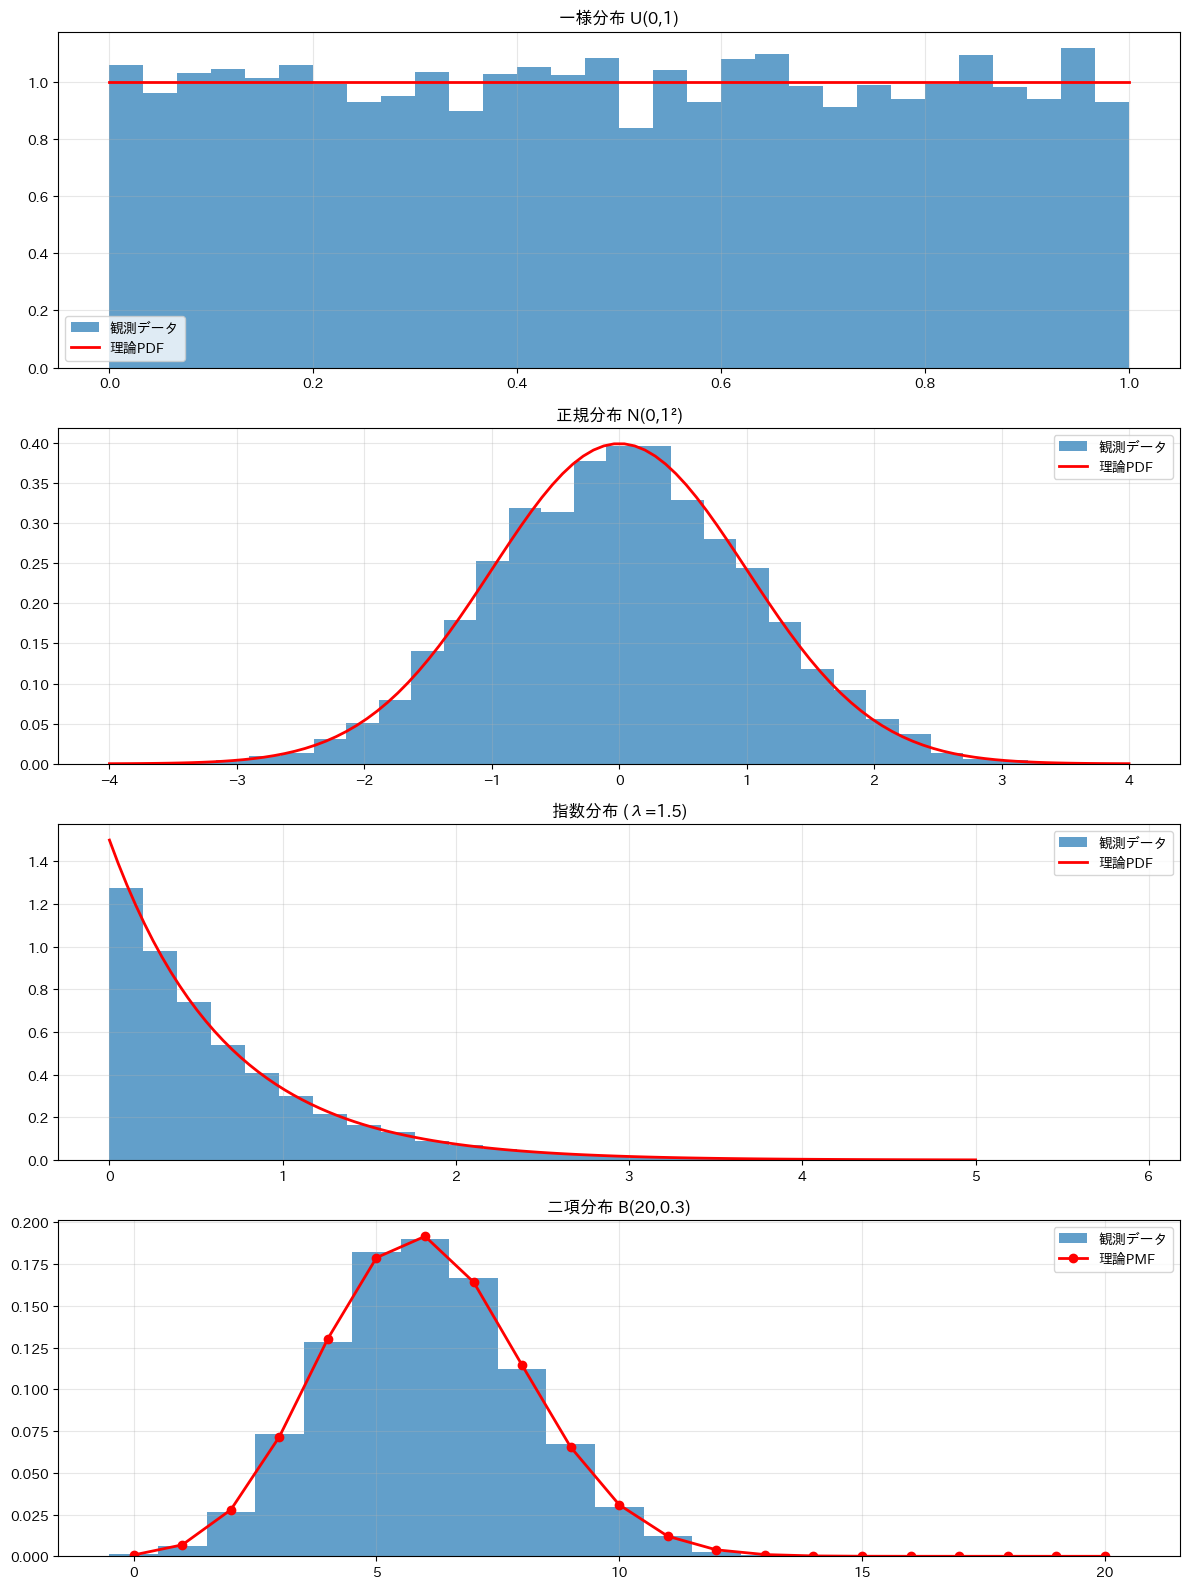

===== 一様分布 U(0,1) =====
理論上の平均: 0.5
観測データの平均: 0.4986
理論上の分散: 0.08333333333333333
観測データの分散: 0.0836

===== 正規分布 N(0,1) =====
理論上の平均: 0
観測データの平均: 0.0188
理論上の分散: 1
観測データの分散: 1.0276

===== 指数分布 (λ={lambda_param}) =====
理論上の平均: 0.6666666666666666
観測データの平均: 0.6607
理論上の分散: 0.4444444444444444
観測データの分散: 0.4131

===== 二項分布 B({trials},{p}) =====
理論上の平均: 6.0
観測データの平均: 5.9924
理論上の分散: 4.199999999999999
観測データの分散: 4.1475


In [3]:
# ======== 2. 正規分布（Normal/Gaussian Distribution）========
# 正規分布: 自然現象や測定誤差などに見られる釣鐘型の分布
# 例: 身長、体重、テストの点数など
# パラメータ: 平均(μ)と標準偏差(σ)で特徴づけられる
mu, sigma = 0, 1  # 平均0、標準偏差1の標準正規分布
normal_samples = np.random.normal(mu, sigma, n)

# ======== 3. 指数分布（Exponential Distribution）========
# 指数分布: イベント間の待ち時間などを表す分布
# 例: 顧客の到着間隔、機器の故障までの時間
# パラメータ: レート(λ)、平均は1/λ
lambda_param = 1.5
exp_samples = np.random.exponential(1/lambda_param, n)

# ======== 4. 二項分布（Binomial Distribution）========
# 二項分布: n回の独立した試行で成功する回数の分布
# 例: コイン投げでの表の回数、くじ引きでの当たりの数
p = 0.3  # 成功確率
trials = 20  # 試行回数
binom_samples = np.random.binomial(trials, p, n)

# ======== データの可視化 ========
fig, axes = plt.subplots(4, 1, figsize=(12, 16))

# 一様分布のヒストグラムと理論的確率密度関数
axes[0].hist(uniform_samples, bins=30, alpha=0.7, density=True, label='観測データ')
x_uniform = np.linspace(0, 1, 100)
axes[0].plot(x_uniform, stats.uniform.pdf(x_uniform, 0, 1), 'r-', lw=2, label='理論PDF')
axes[0].set_title('一様分布 U(0,1)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 正規分布のヒストグラムと理論的確率密度関数
axes[1].hist(normal_samples, bins=30, alpha=0.7, density=True, label='観測データ')
x_normal = np.linspace(-4, 4, 100)
axes[1].plot(x_normal, stats.norm.pdf(x_normal, mu, sigma), 'r-', lw=2, label='理論PDF')
axes[1].set_title(f'正規分布 N({mu},{sigma}²)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 指数分布のヒストグラムと理論的確率密度関数
axes[2].hist(exp_samples, bins=30, alpha=0.7, density=True, label='観測データ')
x_exp = np.linspace(0, 5, 100)
axes[2].plot(x_exp, stats.expon.pdf(x_exp, scale=1/lambda_param), 'r-', lw=2, label='理論PDF')
axes[2].set_title(f'指数分布 (λ={lambda_param})')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# 二項分布のヒストグラムと理論的確率質量関数
x_binom = np.arange(0, trials+1)
axes[3].hist(binom_samples, bins=np.arange(0, trials+2)-0.5, alpha=0.7, density=True, label='観測データ')
axes[3].plot(x_binom, stats.binom.pmf(x_binom, trials, p), 'ro-', lw=2, label='理論PMF')
axes[3].set_title(f'二項分布 B({trials},{p})')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ======== 統計量の計算 ========
# 理論値と実測値の比較
print("===== 一様分布 U(0,1) =====")
print(f"理論上の平均: {0.5}")
print(f"観測データの平均: {np.mean(uniform_samples):.4f}")
print(f"理論上の分散: {1/12}")
print(f"観測データの分散: {np.var(uniform_samples):.4f}")
print()

print("===== 正規分布 N(0,1) =====")
print(f"理論上の平均: {mu}")
print(f"観測データの平均: {np.mean(normal_samples):.4f}")
print(f"理論上の分散: {sigma**2}")
print(f"観測データの分散: {np.var(normal_samples):.4f}")
print()

print("===== 指数分布 (λ={lambda_param}) =====")
print(f"理論上の平均: {1/lambda_param}")
print(f"観測データの平均: {np.mean(exp_samples):.4f}")
print(f"理論上の分散: {1/lambda_param**2}")
print(f"観測データの分散: {np.var(exp_samples):.4f}")
print()

print("===== 二項分布 B({trials},{p}) =====")
print(f"理論上の平均: {trials*p}")
print(f"観測データの平均: {np.mean(binom_samples):.4f}")
print(f"理論上の分散: {trials*p*(1-p)}")
print(f"観測データの分散: {np.var(binom_samples):.4f}")